# <center> TP2 : Reconnaissance de Formes </center>

## <center> Extraction de descripteurs et Mesures de Similarité</center>



## BERNEAUD Noah 21900500

### Distances et plongements
Le but de cette première partie est de calculer la distance d’édition entre deux chaı̂nes de caractères (Par exemple : "minimum" et "maxima". 
1. Écrivez une chaı̂ne en ligne et l’autre en colonne de façon a former le
tableau ci dessous :

<img src="DTW.png" alt="Image d'exemple" width="400" height="200" style="margin-left: 330px;">


$
 \begin{array}{|c|c|c|c|c|c|c|c|c|}
     \hline
      &&m&i&n&i&m&u&m\\
      \hline
      &&&&&&&&\\
      \hline
      m&&&&&&&&\\
      \hline
      a&&&&&&&&\\
      \hline
      x&&&&&&&&\\
      \hline
      i&&&&&&&&\\
      \hline
      m&&&&&&&&\\
      \hline
      a&&&&&&&&\\
      \hline     
    \end{array}
$

2. Remplissez la première ligne et la première colonne. On supposera dans
un premier temps que le coût de suppression, d’insertion et de substitution
de caractères non identiques est égal à 1.

3. Généraliser ensuite  sur le reste du tableau.



## Implémentation en Python

Completez le code de la fonction StringEditDistance() fournie ci-dessous et afficher la matrice correpondante.

In [1]:
import numpy as np
import plotly.graph_objects as go
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import MDS
import numpy as np
import matplotlib.pyplot as plt

[[ 0  2  4  6  8 10 12 14]
 [ 2  0  2  4  6  8 10 12]
 [ 4  2  1  3  5  7  9 11]
 [ 6  4  3  2  4  6  8 10]
 [ 8  6  4  4  2  4  6  8]
 [10  8  6  5  4  2  4  6]
 [12 10  8  7  6  4  3  5]]


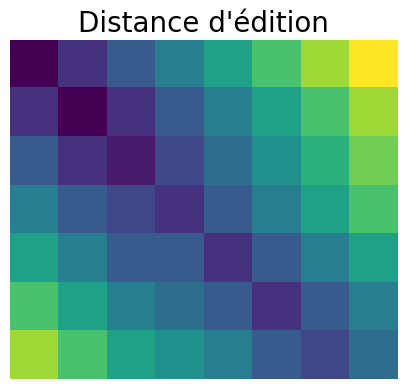

Matrice distance :
==> Cout =  5


In [2]:
def StringEditDistance(ch1,ch2,cost):
        dist=np.empty((len(ch2)+1,len(ch1)+1),dtype=int)
        dist[0,0]=0
        for i in range(1,len(ch1)+1):
            dist[0,i]=dist[0,i-1]+cost['ins']
        for j in range(1,len(ch2)+1):
            dist[j,0]=dist[j-1,0]+cost['del']
        for i in range(1,len(ch1)+1):
            for j in range(1,len(ch2)+1):
                if ch1[i-1]==ch2[j-1]:
                    dist[j,i]=dist[j-1,i-1]
                else:
                    dist[j,i]=min(dist[j-1,i]+cost['del'],dist[j,i-1]+cost['ins'],dist[j-1,i-1]+cost['sub'])
        return dist[len(ch2),len(ch1)],dist
        
    
cost={'ins': 2, 'del':2,'sub':1}
cout, dist =StringEditDistance("minimum","maxima",cost)
print(dist)
plt.figure(figsize=(5, 8))
plt.imshow(dist)
plt.title("Distance d'édition", size=20)
plt.axis('off')
plt.show()
print("Matrice distance :")

print("==> Cout = ", cout)

# Affihcer la matrice  distance



&## Plongement de chaînes

On suppose que l'on dispose d'un fichier contenant la liste de vos prénoms avec un prénom par ligne.  Ce fichier est chargé par la fonction loadNames() fournie. 

In [3]:
def loadNames(file):
    l=[]
    with open(file,"r") as f:
        l=f.readlines()
    l=[n[:-1] for n in l]
    return l

    - Utilisez la liste des prénoms fournie par la fonction loadNames() pour calculer la matrice de distance entre toutes les paires de prénoms. 

    - En se basant sur le cours calculer la matrice de produit scalaire associée (S) puis les coordonnées x et y correspondant aux deux coordonnées de plus grandes valeurs propres de la matrice X codant le plongement. 

    - A partir des coordonnées x et y faire un plot en affichant chaque  prénom à ses  coordonnées (x,y).  Le calcul du graphique à partir de la matrice de distance se fera dans la fonction display() à compléter. 

['Luc', 'Lois', 'Myriam', 'Monique', 'Marcel']


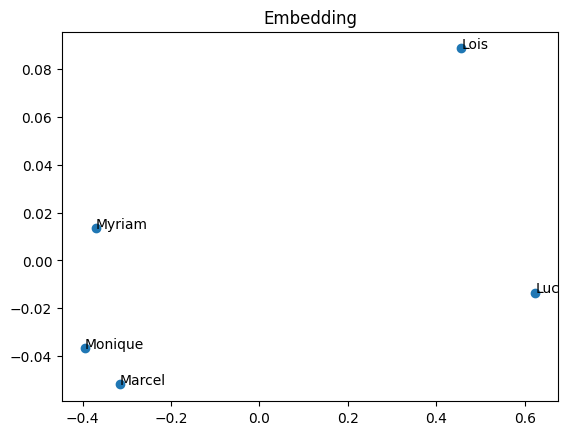

In [4]:
names=loadNames("names.txt")
# Faire appel à la fonction StringEditDistance pour calculer la distance entre deux
distances = np.zeros((len(names),len(names)))
for i in range(len(names)):
        for j in range(len(names)):
            distances[i,j] = (StringEditDistance(names[i],names[j],cost)[0])

def display(distance,names):
    plt.title("Embedding")
    # Faire la décomposition en valeurs singulières (SVD) de la matrice de distance **
    # Avec une matrice de distance, il est possible de calculer une représentation vectorielle (embedding) des données en utilisant des techniques basées sur la matrice de distance.
    # Une méthode courante est la Multidimensional Scaling (MDS) qui vise à trouver une représentation en basse dimension des données tout en préservant les distances entre les points
    # Elle n'est généralement pas directement applicable à une matrice de distance telle quelle ==> On peut faire des transformations (normalisations) telles que :
    # Matrice d'affinité, Matrice Laplacienne ...
    U,S,Vh = np.linalg.svd(distances, full_matrices=True)
    # Appliquer la MDS sur la représentation intermédiaire
    U_2D = U[:, :2]
    mds = MDS(n_components=2, normalized_stress=False)
    embeddings_2D = mds.fit_transform(U_2D)

    # Visualiser les embeddings en 2D avec des étiquettes
    plt.scatter(embeddings_2D[:, 0], embeddings_2D[:, 1])
    for i, name in enumerate(names):
        plt.annotate(name, (embeddings_2D[i, 0], embeddings_2D[i, 1]))



    
print(names)
#print (distances)
display(distances,names)

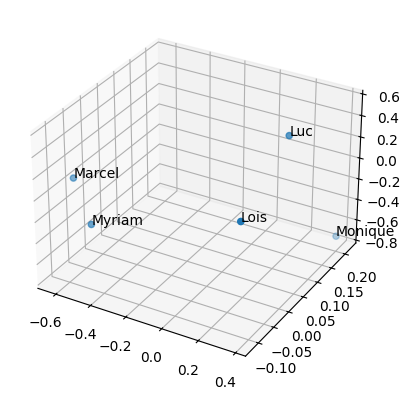

In [5]:
# Afficher le graphique 3D
def display_3d(distances, names):
    U, S, Vh = np.linalg.svd(distances, full_matrices=True)

    # Appliquer la MDS sur la représentation intermédiaire
    U_3D = U[:, :3]
    mds = MDS(n_components=3, normalized_stress=False)
    embeddings_3D = mds.fit_transform(U_3D)

    # Visualiser les embeddings en 3D avec des étiquettes
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(embeddings_3D[:, 0], embeddings_3D[:, 1], embeddings_3D[:, 2])

    for i, name in enumerate(names):
        ax.text(embeddings_3D[i, 0], embeddings_3D[i, 1], embeddings_3D[i, 2], name)

    plt.show()

display_3d(distances, names)

In [6]:
def display_3dP(distances,names):
    U, S, Vh = np.linalg.svd(distances, full_matrices=True)

    # Appliquer la MDS sur la représentation intermédiaire
    U_3D = U[:, :3]
    mds = MDS(n_components=3, normalized_stress=False)
    embeddings_3D = mds.fit_transform(U_3D)

    # Visualiser les embeddings en 3D avec des étiquettes
    fig = go.Figure(data=[go.Scatter3d(
        x=embeddings_3D[:, 0],
        y=embeddings_3D[:, 1],
        z=embeddings_3D[:, 2],
        text=names,
        mode='markers',
        marker=dict(
            size=12,
            color=embeddings_3D[:, 2],
            colorscale='Viridis',
            opacity=0.8
        )
    )])

    # tight layout
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.show()
display_3dP(distances, names)

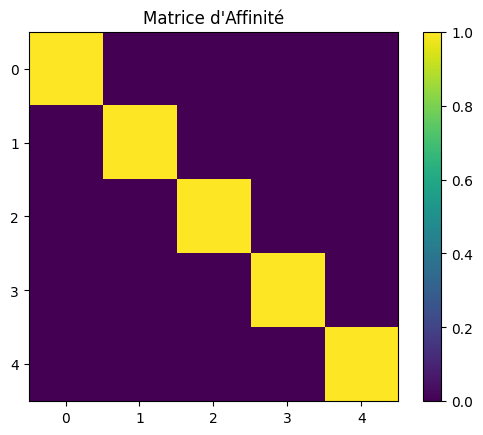

In [7]:
distance_matrix=distances.copy()
# Exemple de calcul d'affinité (matrice de poids)
sigma = 1.0
affinity_matrix = np.exp(-distance_matrix ** 2 / sigma )
affinity_matrix2 = np.rot90(affinity_matrix)


# Exemple de calcul du Laplacien non normalisé

laplacian_matrix = np.diag(np.sum(affinity_matrix, axis=1)) - affinity_matrix

# Exemple de diffusion de la chaleur (utilisation de l'exponentielle de la matrice Laplacienne)
heat_diffusion = np.exp(-laplacian_matrix)

# Affichage de la matrice d'affinité sous forme d'image

plt.imshow(affinity_matrix, cmap='viridis', interpolation='nearest')
plt.title('Matrice d\'Affinité')
plt.colorbar()
plt.show()


# Affichage de la matrice d'affinité avec plotly



# Création de la figure
heatmap = go.Heatmap(z=affinity_matrix2)

 # Création de la mise en page
layout = go.Layout(title='Matrice d\'Affinité',width=500, height=500)


# Création de la figure
fig = go.Figure(data=[heatmap], layout=layout)

# Affichage de la figure
fig.show()

In [8]:
# Création de la figure
heatmap = go.Heatmap(z=heat_diffusion)

 # Création de la mise en page
layout = go.Layout(title='Diffusion de la chaleur',width=500, height=500)


# Création de la figure
fig = go.Figure(data=[heatmap], layout=layout)

# Affichage de la figure
fig.show()

In [12]:
# Création de la figure
heatmap = go.Heatmap(z=laplacian_matrix)
 # Création de la mise en page
layout = go.Layout(title='Matrice Laplacienne',width=500, height=500)


# Création de la figure
fig = go.Figure(data=[heatmap], layout=layout)

# Affichage de la figure
fig.show()

##  A Faire :
    - Utiliser une approche interactive pour le choix  des paramètres 
    - Utiliser plusieurs métriques appropriés aux données (texte) à tester et comparer
    - Utiliser plusieurs normalisations du noyau (distances) 
    - Afficher graphique 3D de chaque noyau ===> Comparaisons

In [ ]:
#Approche interactive pour le choix des paramètres
from ipywidgets import interact, interactive, fixed, interact_manual, ToggleButton
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import Button, HBox, VBox

def plot(matrix, name_matrix):
    heatmap = go.Heatmap(z=matrix)
    layout = go.Layout(title=name_matrix,width=500, height=500)
    fig = go.Figure(data=[heatmap], layout=layout)
    fig.show()

def calcul_distance_matrix(names, cost):
    distances = np.zeros((len(names), len(names)))
    for i in range(len(names)):
        for j in range(len(names)):
            distances[i, j] = (StringEditDistance(names[i], names[j], cost)[0])
    return distances

def f(sigma, cout_add_supp, cout_sub, choice,matrice):
    cost = {'ins': cout_add_supp, 'del': cout_add_supp , 'sub': cout_sub}
    distance_matrix = calcul_distance_matrix(names, cost)
    affinity_matrix = np.exp(-distance_matrix ** 2 / sigma )
    affinity_matrix = np.rot90(affinity_matrix)
    if(matrice == 'Matrice d\'Affinité'):
        if choice == 'Matrice':
            plot(affinity_matrix, 'Matrice d\'Affinité')
        else:
            display_3dP(affinity_matrix, names)
    elif(matrice == 'Diffusion de la chaleur'):
        laplacian_matrix = np.diag(np.sum(affinity_matrix, axis=1)) - affinity_matrix
        heat_diffusion = np.exp(-laplacian_matrix)
        if choice == 'Matrice':
            plot(heat_diffusion, 'Diffusion de la chaleur')
        else:
            display_3dP(heat_diffusion, names)
    else:
        laplacian_matrix = np.diag(np.sum(affinity_matrix, axis=1)) - affinity_matrix
        if choice == 'Matrice':
            plot(laplacian_matrix, 'Matrice Laplacienne')
        else:
            display_3dP(laplacian_matrix, names)


sigma_slider = widgets.FloatSlider(min=0.1, max=20, step=0.1, value=1.0)
cout_add_supp_slider = widgets.FloatSlider(min=1, max=10, step=1, value=1)
cout_sub_slider = widgets.FloatSlider(min=1, max=10, step=1, value=1)
matrice = widgets.Dropdown(
    options=['Matrice d\'Affinité', 'Diffusion de la chaleur', 'Matrice Laplacienne'],
    value='Matrice d\'Affinité',
    description='Matrice:',
    disabled=False,
    layout={'width': 'max-content'}

)

choice = widgets.Dropdown(
    options=['Matrice', 'Plot_3D'],
    value='Matrice',
    description='Affichage:',
    disabled=False,
)

interact_manual(f, choice=choice , sigma=sigma_slider, cout_add_supp=cout_add_supp_slider, cout_sub=cout_sub_slider, matrice=matrice)


interactive(children=(FloatSlider(value=1.0, description='sigma', max=20.0, min=0.1), FloatSlider(value=1.0, d…

<function __main__.f(sigma, cout_add_supp, cout_sub, choice, matrice)>